In [2]:
import numpy as np
import qutip as qt

# generate ideal targets
qCZ = qt.cphase(np.pi)
qRX90 = (-np.pi*.25j*qt.sigmax()).expm()
qI = qt.qeye(2)

In [102]:
from IPython.display import Image
import matplotlib.pyplot as plt

In [3]:
import grove.tomography.qpu_characterization
reload(grove.tomography.qpu_characterization);

In [4]:
from pyquil.api import get_devices, QPUConnection, QVMConnection
from pyquil.gates import RX, CZ, I
from grove.tomography.qpu_characterization import parallel_process_tomographies, parallel_sample_assignment_probs
from grove.tomography.process_tomography import DEFAULT_PROCESS_TOMO_SETTINGS

import grove.tomography.utils as ut

# fancy TQDM progress bars
ut.notebook_mode(True)

In [5]:
DEFAULT_PROCESS_TOMO_SETTINGS

TomographySettings(constraints=set(['trace_preserving']), solver_kwargs={'max_iters': 20000, 'verbose': False})

In [142]:
get_devices()

{<Device 8Q-Agave offline>, <Device 19Q-Acorn offline>}

In [44]:
qpu = QPUConnection('19Q-Acorn', status_time=False)
# qpu = QVMConnection()

In [12]:
dead = [3]
edges = map(tuple, [[0, 5], [0, 6], [1, 6], [1, 7], [2, 7], [2, 8], [4, 9], [5, 10], [6, 11], [7, 12], [8, 13], [9, 14], [10, 15], [10, 16], [11, 16], [11, 17], [12, 17], [12, 18], [13, 18], [13, 19], [14, 19]])
qubits = [x for x in range(20) if x not in dead]

In [13]:
cliques_2q1 = map(tuple, [
    [0, 5], [10, 15], [1, 6], [11, 16], [2, 7], [12, 17], [13, 18], [4, 9], [14, 19], 
])
cliques_2q2 = map(tuple,[
    [0, 6], [10, 16], [1, 7], [11, 17], [2, 8], [12, 18], [13, 19],
])
cliques_2q3 = map(tuple,[
    [5, 10], [6, 11], [7, 12], [8, 13], [9, 14],
]

In [14]:
# ensure complete
set(edges) - set(cliques_2q1+cliques_2q2+cliques_2q3)

set()

In [16]:
# no duplicates 1
set(cliques_2q1) & set(cliques_2q2+cliques_2q3)

set()

In [18]:
# no duplicates 2
set(cliques_2q2) & set(cliques_2q3)

set()

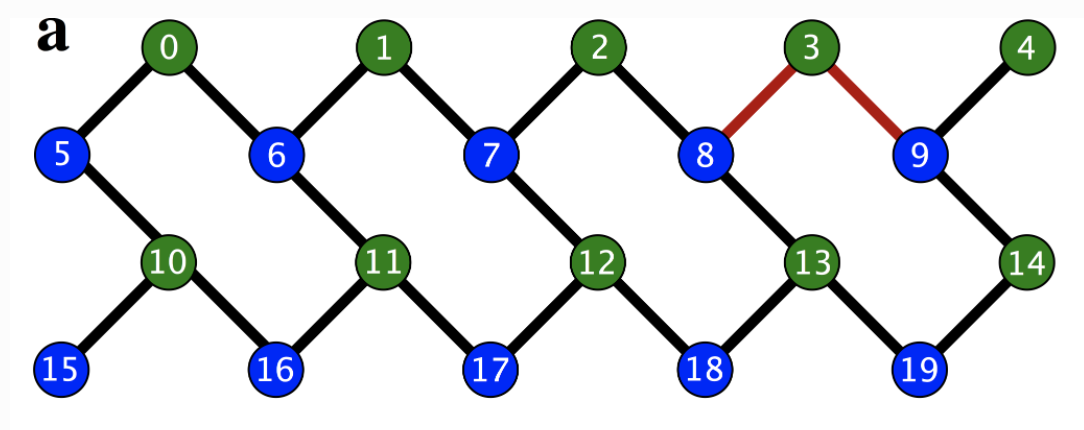

In [67]:
Image("19Q-Acorn.png")

In [78]:
cliques_2q_staggered_1 = map(tuple, [
    [0, 5], [11, 16], [2, 7], [13, 18], [4, 9],
])

cliques_2q_staggered_2 = map(tuple, [
   [10, 15], [1, 6], [12, 17], [14, 19], 
])

cliques_2q_staggered_3 = map(tuple,[
    [0, 6], [10, 16], [2, 8], [12, 18],
])

cliques_2q_staggered_4 = map(tuple,[
    [1, 7], [11, 17], [13, 19],
])

cliques_2q_staggered_5 = map(tuple,[
    [5, 10], [6, 11], [7, 12], [8, 13], [9, 14],
])

In [79]:
# ensure complete
set(edges) - set(cliques_2q_staggered_1+cliques_2q_staggered_2+cliques_2q_staggered_3+cliques_2q_staggered_4+cliques_2q_staggered_5)

set()

In [80]:
# no duplicates 1
set(cliques_2q_staggered_1) & set(cliques_2q_staggered_3+cliques_2q_staggered_4+cliques_2q_staggered_5)

set()

In [81]:
# no duplicates 2
set(cliques_2q_staggered_2) & set(cliques_2q_staggered_3+cliques_2q_staggered_4+cliques_2q_staggered_5)

set()

In [82]:
# no duplicates 2
set(cliques_2q_staggered_3) & set(cliques_2q_staggered_4+cliques_2q_staggered_5)

set()

In [83]:
# no duplicates 2
set(cliques_2q_staggered_4) & set(cliques_2q_staggered_5)

set()

In [21]:
%%time
I_tomos = parallel_process_tomographies(I, [[q] for q in qubits], 4000, qpu)
RX90_tomos = parallel_process_tomographies(RX(np.pi/2), [[q] for q in qubits], 4000, qpu)

HBox(children=(IntProgress(value=0, max=2), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=16), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=2), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=16), HTML(value=u'')))


CPU times: user 7.87 s, sys: 399 ms, total: 8.26 s
Wall time: 1min 33s


In [45]:
%%time
CZ_tomos1 = parallel_process_tomographies(CZ, cliques_2q1, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 44.5 s, sys: 2.02 s, total: 46.5 s
Wall time: 10min 56s


In [48]:
%%time
CZ_tomos2 = parallel_process_tomographies(CZ, cliques_2q2, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 38.2 s, sys: 1.91 s, total: 40.1 s
Wall time: 10min 33s


In [51]:
%%time
CZ_tomos3 = parallel_process_tomographies(CZ, cliques_2q3, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 31 s, sys: 1.75 s, total: 32.8 s
Wall time: 9min 32s


In [86]:
%%time
CZ_tomos_staggered1 = parallel_process_tomographies(CZ, cliques_2q_staggered_1, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 30.1 s, sys: 1.74 s, total: 31.8 s
Wall time: 9min 26s


In [87]:
%%time
CZ_tomos_staggered2 = parallel_process_tomographies(CZ, cliques_2q_staggered_2, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 27.7 s, sys: 1.63 s, total: 29.4 s
Wall time: 9min 27s


In [61]:
%%time
CZ_tomos_staggered3 = parallel_process_tomographies(CZ, cliques_2q_staggered_3, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 25 s, sys: 1.57 s, total: 26.6 s
Wall time: 9min 25s


In [62]:
%%time
CZ_tomos_staggered4 = parallel_process_tomographies(CZ, cliques_2q_staggered_4, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 22.7 s, sys: 1.52 s, total: 24.2 s
Wall time: 9min 22s


In [63]:
%%time
CZ_tomos_staggered5 = parallel_process_tomographies(CZ, cliques_2q_staggered_5, 2000, qpu)

HBox(children=(IntProgress(value=0, max=4), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=256), HTML(value=u'')))


CPU times: user 30.9 s, sys: 1.76 s, total: 32.7 s
Wall time: 10min


In [76]:
import cPickle as pickle
with open("qpu_gates_constrained.pickle", "wb") as f:
    tomos = {k: v for k,v in globals().items() if "_tomos" in k or "cliques" in k}
    print("Storing {}".format(list(tomos.keys())))
    pickle.dump(tomos, f)

Storing ['I_tomos', 'CZ_tomos_staggered4', 'CZ_tomos_staggered5', 'CZ_tomos_staggered2', 'CZ_tomos_staggered3', 'CZ_tomos_staggered1', 'cliques_2q_staggered_4', 'cliques_2q_staggered_5', 'CZ_tomos3', 'CZ_tomos2', 'RX90_tomos', 'cliques_2q_staggered_1', 'cliques_2q_staggered_2', 'cliques_2q_staggered_3', 'CZ_tomos1', 'cliques_2q2', 'cliques_2q1', 'cliques_2q3']


In [ ]:
import qutip as qt

In [52]:
print("Simultaneously taken on {}\n".format(cliques_2q1))
for pair, pt in zip(cliques_2q1, CZ_tomos1[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("Simultaneously taken on {}\n".format(cliques_2q2))
for pair, pt in zip(cliques_2q2, CZ_tomos2[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("Simultaneously taken on {}\n".format(cliques_2q3))
for pair, pt in zip(cliques_2q3, CZ_tomos3[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))


Simultaneously taken on [(0, 5), (10, 15), (1, 6), (11, 16), (2, 7), (12, 17), (13, 18), (4, 9), (14, 19)]

Average Gate Fidelity for CZ (0, 5) F_avg=23.4%
Average Gate Fidelity for CZ (10, 15) F_avg=50.6%
Average Gate Fidelity for CZ (1, 6) F_avg=28.5%
Average Gate Fidelity for CZ (11, 16) F_avg=20.7%
Average Gate Fidelity for CZ (2, 7) F_avg=68.6%
Average Gate Fidelity for CZ (12, 17) F_avg=41.8%
Average Gate Fidelity for CZ (13, 18) F_avg=36.2%
Average Gate Fidelity for CZ (4, 9) F_avg=42%
Average Gate Fidelity for CZ (14, 19) F_avg=26%
Simultaneously taken on [(0, 6), (10, 16), (1, 7), (11, 17), (2, 8), (12, 18), (13, 19)]

Average Gate Fidelity for CZ (0, 6) F_avg=66.3%
Average Gate Fidelity for CZ (10, 16) F_avg=49.9%
Average Gate Fidelity for CZ (1, 7) F_avg=68.6%
Average Gate Fidelity for CZ (11, 17) F_avg=55.6%
Average Gate Fidelity for CZ (2, 8) F_avg=59.3%
Average Gate Fidelity for CZ (12, 18) F_avg=27.6%
Average Gate Fidelity for CZ (13, 19) F_avg=80.2%
Simultaneously taken

In [88]:
print("Simultaneously taken on {}\n".format(cliques_2q_staggered_1))
for pair, pt in zip(cliques_2q_staggered_1, CZ_tomos_staggered1[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("Simultaneously taken on {}\n".format(cliques_2q_staggered_2))
for pair, pt in zip(cliques_2q_staggered_2, CZ_tomos_staggered2[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("Simultaneously taken on {}\n".format(cliques_2q_staggered_3))
for pair, pt in zip(cliques_2q_staggered_3, CZ_tomos_staggered3[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("Simultaneously taken on {}\n".format(cliques_2q_staggered_4))
for pair, pt in zip(cliques_2q_staggered_4, CZ_tomos_staggered4[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("Simultaneously taken on {}\n".format(cliques_2q_staggered_5))
for pair, pt in zip(cliques_2q_staggered_5, CZ_tomos_staggered5[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))


Simultaneously taken on [(0, 5), (11, 16), (2, 7), (13, 18), (4, 9)]

Average Gate Fidelity for CZ (0, 5) F_avg=24.5%
Average Gate Fidelity for CZ (11, 16) F_avg=32.4%
Average Gate Fidelity for CZ (2, 7) F_avg=78.2%
Average Gate Fidelity for CZ (13, 18) F_avg=41.5%
Average Gate Fidelity for CZ (4, 9) F_avg=30.9%
Simultaneously taken on [(10, 15), (1, 6), (12, 17), (14, 19)]

Average Gate Fidelity for CZ (10, 15) F_avg=86.7%
Average Gate Fidelity for CZ (1, 6) F_avg=81%
Average Gate Fidelity for CZ (12, 17) F_avg=91.8%
Average Gate Fidelity for CZ (14, 19) F_avg=29.5%
Simultaneously taken on [(0, 6), (10, 16), (2, 8), (12, 18)]

Average Gate Fidelity for CZ (0, 6) F_avg=82%
Average Gate Fidelity for CZ (10, 16) F_avg=75.8%
Average Gate Fidelity for CZ (2, 8) F_avg=77.8%
Average Gate Fidelity for CZ (12, 18) F_avg=54.8%
Simultaneously taken on [(1, 7), (11, 17), (13, 19)]

Average Gate Fidelity for CZ (1, 7) F_avg=94.3%
Average Gate Fidelity for CZ (11, 17) F_avg=81.6%
Average Gate Fidel

In [ ]:
for pt in CZ_tomos2[0]:
    print(pt.avg_gate_fidelity(qCZ))

In [44]:
print("Simultaneously taken on {}\n".format(staggered_cliques1))
for pair, pt in zip(staggered_cliques1, CZ_tomos_staggered1[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ)))
print("\nSimultaneously taken on {}\n".format(staggered_cliques2))
for pair, pt in zip(staggered_cliques2, CZ_tomos_staggered2[0]):
    print("Average Gate Fidelity for CZ {} F_avg={:0.3g}%".format(pair, 100*pt.avg_gate_fidelity(qCZ))) 

Simultaneously taken on [(0, 1), (4, 5)]

Average Gate Fidelity for CZ (0, 1) F_avg=91.5%
Average Gate Fidelity for CZ (4, 5) F_avg=90.1%

Simultaneously taken on [(2, 3), (6, 7)]

Average Gate Fidelity for CZ (2, 3) F_avg=73.1%
Average Gate Fidelity for CZ (6, 7) F_avg=84.1%


In [ ]:
for pt in CZ_tomos_staggered1[0]:
    print(pt.avg_gate_fidelity(qCZ))

In [24]:
print("Simultaneously taken on {}\n".format(qubits))
for q, pt in zip(qubits, RX90_tomos[0]):
    print("Average Gate Fidelity for RX(pi/2) {} F_avg={:0.3g}%".format(q, 100*pt.avg_gate_fidelity(qRX90)))


Simultaneously taken on [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Average Gate Fidelity for RX(pi/2) 0 F_avg=97.5%
Average Gate Fidelity for RX(pi/2) 1 F_avg=97.8%
Average Gate Fidelity for RX(pi/2) 2 F_avg=100%
Average Gate Fidelity for RX(pi/2) 4 F_avg=97.6%
Average Gate Fidelity for RX(pi/2) 5 F_avg=96.2%
Average Gate Fidelity for RX(pi/2) 6 F_avg=98.7%
Average Gate Fidelity for RX(pi/2) 7 F_avg=96%
Average Gate Fidelity for RX(pi/2) 8 F_avg=96.3%
Average Gate Fidelity for RX(pi/2) 9 F_avg=97.9%
Average Gate Fidelity for RX(pi/2) 10 F_avg=98.2%
Average Gate Fidelity for RX(pi/2) 11 F_avg=98.2%
Average Gate Fidelity for RX(pi/2) 12 F_avg=98.4%
Average Gate Fidelity for RX(pi/2) 13 F_avg=98.4%
Average Gate Fidelity for RX(pi/2) 14 F_avg=98.9%
Average Gate Fidelity for RX(pi/2) 15 F_avg=99.8%
Average Gate Fidelity for RX(pi/2) 16 F_avg=101%
Average Gate Fidelity for RX(pi/2) 17 F_avg=98.8%
Average Gate Fidelity for RX(pi/2) 18 F_avg=102%
Average Gate Fidelity

In [25]:
print("Simultaneously taken on {}\n".format(qubits))
for q, pt in zip(qubits, I_tomos[0]):
    print("Average Gate Fidelity for I {} F_avg={:0.3g}%".format(q, 100*pt.avg_gate_fidelity(qI)))


Simultaneously taken on [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Average Gate Fidelity for I 0 F_avg=97.7%
Average Gate Fidelity for I 1 F_avg=96.3%
Average Gate Fidelity for I 2 F_avg=99.4%
Average Gate Fidelity for I 4 F_avg=96.8%
Average Gate Fidelity for I 5 F_avg=101%
Average Gate Fidelity for I 6 F_avg=96.2%
Average Gate Fidelity for I 7 F_avg=95.2%
Average Gate Fidelity for I 8 F_avg=95.4%
Average Gate Fidelity for I 9 F_avg=100%
Average Gate Fidelity for I 10 F_avg=98.1%
Average Gate Fidelity for I 11 F_avg=98.8%
Average Gate Fidelity for I 12 F_avg=99.5%
Average Gate Fidelity for I 13 F_avg=97.6%
Average Gate Fidelity for I 14 F_avg=97.3%
Average Gate Fidelity for I 15 F_avg=98.1%
Average Gate Fidelity for I 16 F_avg=99.5%
Average Gate Fidelity for I 17 F_avg=101%
Average Gate Fidelity for I 18 F_avg=99.7%
Average Gate Fidelity for I 19 F_avg=99.1%


In [53]:
from grove.tomography.process_tomography import ProcessTomography

In [91]:
tomo = CZ_tomos_staggered5[0][0]

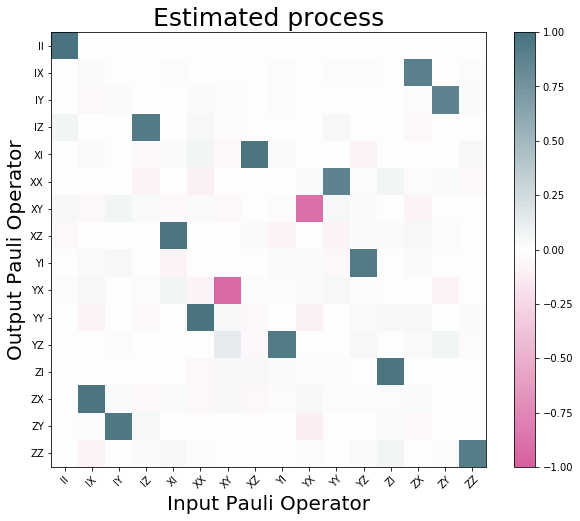

In [93]:
tomo.plot();

In [99]:
ks = qt.to_kraus(tomo.sop)

Text(0,0.5,u'${\\rm Tr} K_j^\\dagger K_j$')

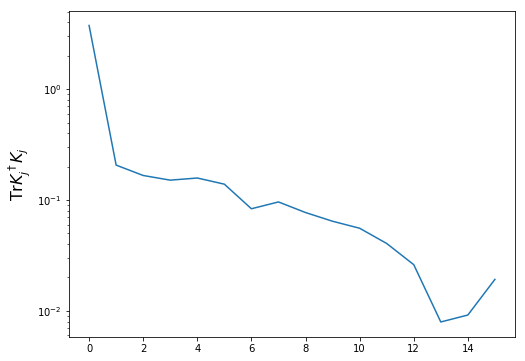

In [115]:
plt.figure(figsize=(8, 6))
plt.semilogy([(kj.dag()*kj).tr() for kj in ks])
plt.ylabel(r"${\rm Tr} K_j^\dagger K_j$", size=16)

Text(0,0.5,u'$|\\lambda_j|$')

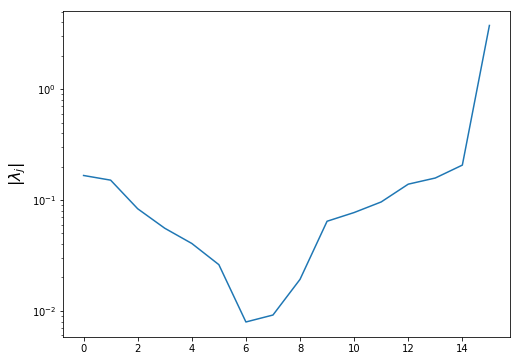

In [113]:
plt.figure(figsize=(8, 6))
plt.semilogy(abs(tomo.to_choi().eigenenergies()))
plt.ylabel(r"$|\lambda_j|$", size=16)

In [116]:
chois = []
for cutoff in range(3, 16):
    kraus_ops = ks[:cutoff]
    s = sum((kj.dag()*kj).tr() for kj in kraus_ops)/kraus_ops[0].shape[0]
    
    chois.append(qt.kraus_to_choi([k/s for k in kraus_ops]))

In [123]:
c0 = qt.to_choi(tomo.sop)

In [124]:
c0

Quantum object: dims = [[[2, 2], [2, 2]], [[2, 2], [2, 2]]], shape = (16, 16), type = super, isherm = True, superrep = choi
Qobj data =
[[  9.94570095e-01+0.j          -2.47078305e-02-0.02135824j
    3.42264288e-03+0.00841959j  -1.88671108e-02-0.00961739j
   -2.88678783e-02-0.00845982j   9.46635965e-01+0.05747675j
    5.21721973e-02-0.03124864j   3.13993675e-03+0.01758115j
    1.60140954e-02+0.01409217j  -1.25568046e-02-0.03344388j
    9.83588664e-01+0.0019601j    1.70854267e-03-0.01016344j
   -7.23350218e-03-0.00457092j  -3.86414483e-02+0.01587918j
    7.56387546e-02-0.0230627j   -9.42287872e-01+0.0513691j ]
 [ -2.47078305e-02+0.02135824j  -1.01115109e-03+0.j
   -8.28807433e-03+0.02733995j   9.05517896e-04+0.00021383j
    1.07357152e-02-0.02682342j   3.15734024e-02+0.00672863j
   -4.20901559e-02-0.04408058j  -1.67143010e-03+0.00240221j
   -9.34574833e-03-0.03241511j   1.49730496e-03-0.00179367j
   -1.70692808e-02-0.02385558j  -8.60250793e-03+0.00145128j
    3.24532105e-02+0.0387196j  

In [133]:
W = np.random.randn(4,4) + 1j*np.random.randn(4,4)
rhomat = W.dot(W.conjugate().T)
rhomat /= np.trace(rhomat)
rho = qt.Qobj(rhomat)
rho2 = qt.Qobj(rhomat, dims=[[2,2], [2,2]])

In [134]:
rho2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.58443599+0.j          0.00149476-0.10250865j  0.03635077+0.02159328j
   0.07999177-0.0817056j ]
 [ 0.00149476+0.10250865j  0.09565535+0.j         -0.00563431+0.05400123j
   0.00513188-0.00811694j]
 [ 0.03635077-0.02159328j -0.00563431-0.05400123j  0.12584638+0.j
  -0.06699026+0.10529331j]
 [ 0.07999177+0.0817056j   0.00513188+0.00811694j -0.06699026-0.10529331j
   0.19406228+0.j        ]]

In [127]:
ks2 = qt.to_kraus(tomo.sop)

In [135]:
tomo.sop(rho2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.58889520+0.j         -0.00550797-0.09974771j  0.03443387+0.01057969j
  -0.09302851+0.08389573j]
 [-0.00550797+0.09974771j  0.09939545+0.j         -0.00247740+0.07943741j
   0.00472660+0.02180265j]
 [ 0.03443387-0.01057969j -0.00247740-0.07943741j  0.13477488+0.j
   0.05053288-0.09551285j]
 [-0.09302851-0.08389573j  0.00472660-0.02180265j  0.05053288+0.09551285j
   0.17657526+0.j        ]]

In [136]:
sum(ks2j*rho*ks2j.dag() for ks2j in ks2)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.66064222+0.j          0.00534169-0.08302194j  0.03708497+0.00562506j
  -0.07697918+0.08145385j]
 [ 0.00534169+0.08302194j  0.17628333+0.j          0.00696522+0.04631264j
  -0.00440349+0.00942522j]
 [ 0.03708497-0.00562506j  0.00696522-0.04631264j  0.19165035+0.j
   0.05078583-0.10203281j]
 [-0.07697918-0.08145385j -0.00440349-0.00942522j  0.05078583+0.10203281j
   0.23045803+0.j        ]]

In [122]:
c0 = tomo.to_choi().data.todense()
for c in chois:
    print(np.linalg.norm(c.data.todense()-c0))

0.510429179521
0.698218655157
0.852361291028
0.996759603428
1.09353851139
1.18959780978
1.26469224552
1.3257135094
1.38009790237
1.41828253064
1.44220185752
1.44932033128
1.45744228697


In [121]:
tomo.to_choi().data- choi

<16x16 sparse matrix of type '<type 'numpy.complex128'>'
	with 256 stored elements in Compressed Sparse Row format>

In [119]:
chois[0]

Quantum object: dims = [[[4], [4]], [[4], [4]]], shape = (16, 16), type = super, isherm = True, superrep = choi
Qobj data =
[[  9.54024520e-01 +0.00000000e+00j  -3.83327163e-03 +1.73181119e-03j
   -1.33398895e-02 +4.49213612e-03j   7.80652899e-04 +1.69453500e-03j
   -1.02855321e-02 -3.23594126e-03j   8.94211841e-01 +3.03861482e-02j
    5.91962823e-02 -2.57063222e-02j  -3.61806393e-02 -1.71503971e-02j
   -3.85535543e-02 +5.74417593e-03j  -3.74315981e-02 -2.89067928e-02j
    9.09742704e-01 -1.31533797e-03j   2.33103903e-02 +5.81708726e-03j
    8.89148234e-03 -6.21229633e-03j  -2.77588971e-02 +1.13234618e-03j
    3.47606219e-02 -2.00210100e-02j  -8.62190543e-01 +2.06097235e-02j]
 [ -3.83327163e-03 -1.73181119e-03j   8.42287932e-03 +0.00000000e+00j
    1.00052183e-02 -5.62837005e-03j   6.74309636e-04 -5.16272931e-03j
    8.75474820e-03 +3.84445550e-03j   1.15985260e-03 +1.36613894e-02j
   -9.72262131e-03 -6.42927688e-04j   4.47097997e-04 +1.55763064e-02j
   -5.04903926e-03 -1.34371372e-02j